In [2]:
import pandas as pd
pd.set_option('display.max_rows', 20000)
# Base folder for the Instacart dataset
BASE_PATH = "C:\\Users\\Porfirio\\Desktop\\proj3\\comp541Proj\\"
#BASE_PATH = "drive/MyDrive/COMP 541/instacart-market-basket-analysis/"

# 1. Orders data
df_orders = pd.read_csv(f"{BASE_PATH}orders.csv")

# 2. Products data
df_products = pd.read_csv(f"{BASE_PATH}products.csv")

# 3. Departments data
df_departments = pd.read_csv(f"{BASE_PATH}departments.csv")

#4. Aisles
df_aisles = pd.read_csv(f"{BASE_PATH}aisles.csv")

#5. Order Products Train
df_order_products_train = pd.read_csv(f"{BASE_PATH}order_products__train.csv")

In [3]:
display(df_departments)
display(df_aisles)
display(df_products)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [4]:
# Drop conflicting columns before merging
df_order_products_train = df_order_products_train.drop(columns=['aisle_id', 'department_id', 'product_name'], errors='ignore')

# Merge df_order_products_train with df_products
df_order_products_train = df_order_products_train.merge(
	df_products, on='product_id', how='left', suffixes=('_train', '_products')
)
display(df_order_products_train.head())

# Merge products with aisle name and department name
df_products_info = df_products.merge(df_aisles, on='aisle_id', how='left')
df_products_info = df_products_info.merge(df_departments, on='department_id', how='left')
# Show aisles with the most products ordered
df_order_products = df_order_products_train.groupby('aisle_id').size().reset_index(name='count')
df_order_products = df_order_products.merge(df_aisles, on='aisle_id', how='left')
df_order_products = df_order_products.sort_values(by='count', ascending=False)
display(df_order_products.head(10))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


,aisle_id,count,aisle
82,83,150609,fresh vegetables
23,24,150473,fresh fruits
122,123,78493,packaged vegetables fruits
119,120,55240,yogurt
20,21,41699,packaged cheese
114,115,36617,water seltzer sparkling water
83,84,32644,milk
106,107,31269,chips pretzels
90,91,26240,soy lactosefree
111,112,23635,bread


Text(0, 0.5, 'Aisle')

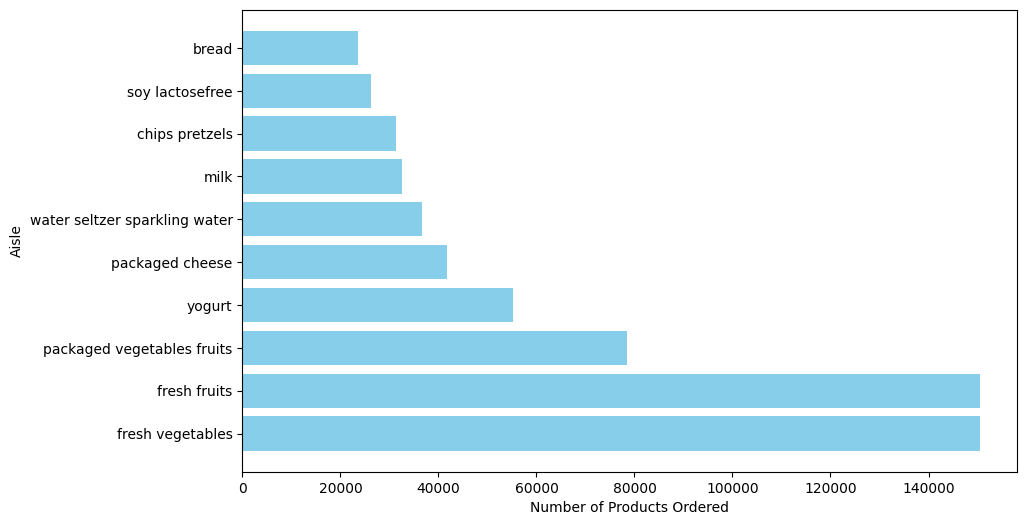

In [43]:
#Plot df_order_products
import matplotlib.pyplot as plt

#Plot the top 10 aisles with the most products ordered
plt.figure(figsize=(10, 6))
plt.barh(df_order_products['aisle'].head(10), df_order_products['count'].head(10), color='skyblue')
plt.xlabel('Number of Products Ordered')
plt.ylabel('Aisle')

In [5]:
#Remove products that are from aisles_id  83, 24, and 123
df_order_products_train = df_order_products_train[~df_order_products_train['aisle_id'].isin([83, 24, 123])]
#Get all orders that have alcohol products
df_alcohol_orders = df_order_products_train[df_order_products_train['department_id'] == 5]['order_id'].unique()
display(df_alcohol_orders)

array([   1325,    2985,    3209, ..., 3419893, 3420729, 3420745],
      shape=(3105,))

In [12]:
#Get top products that are ordered with alcohol products
df_alcohol_products_train = df_order_products_train[df_order_products_train['order_id'].isin(df_alcohol_orders)]
df_alcohol_products = df_alcohol_products_train.groupby('product_id').size().reset_index(name='count')
df_alcohol_products = df_alcohol_products.merge(df_products, on='product_id', how='left')
df_alcohol_products = df_alcohol_products.sort_values(by='count', ascending=False)
display(df_alcohol_products.head(10))

#Get top products that are ordered with alcohol products and are not alcohol products
df_ordered_with__al_products_train = df_order_products_train[df_order_products_train['order_id'].isin(df_alcohol_orders)]
df_ordered_with__al_products_train = df_ordered_with__al_products_train[~df_ordered_with__al_products_train['department_id'].isin([5])]
df_ordered_with__al_products = df_ordered_with__al_products_train.groupby('product_id').size().reset_index(name='count')
df_ordered_with__al_products = df_ordered_with__al_products.merge(df_products, on='product_id', how='left')
df_ordered_with__al_products = df_ordered_with__al_products.sort_values(by='count', ascending=False)

,product_id,count,product_name,aisle_id,department_id
350,2120,295,Sauvignon Blanc,62,5
5648,33065,237,Cabernet Sauvignon,28,5
7855,46088,224,Beer,27,5
6563,38444,193,Chardonnay,62,5
7706,45190,191,Vodka,124,5
7027,41131,157,India Pale Ale,27,5
2001,12013,139,Pinot Noir,28,5
192,1160,116,Pinot Grigio,62,5
4750,27885,91,Malbec,28,5
6473,37923,80,Prosecco Sparkling Wine,134,5


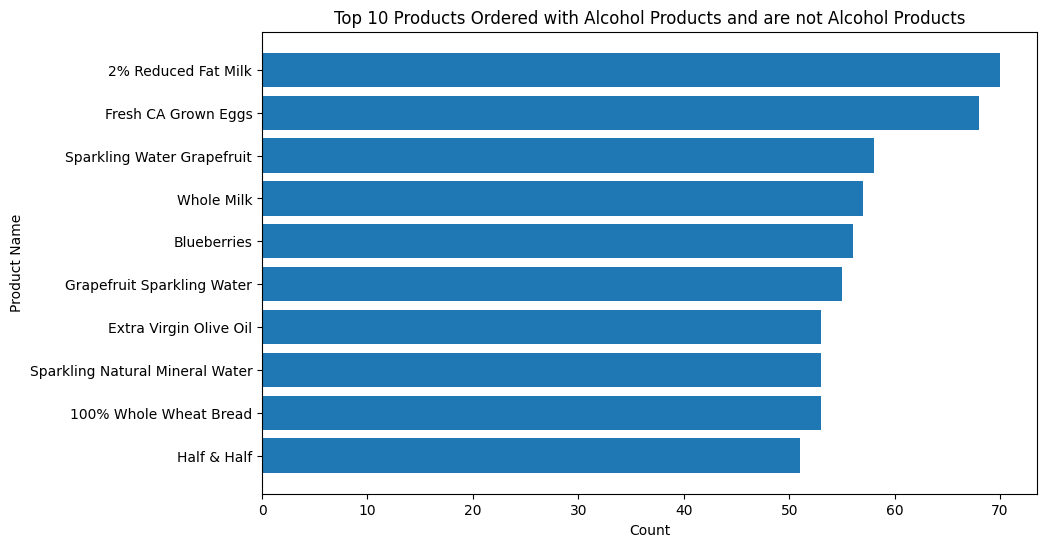

In [13]:
#Plotting the top 10 products ordered with alcohol products and are not alcohol products
import matplotlib.pyplot as plt

#plotting the top 10 products ordered with alcohol products and are not alcohol products
plt.figure(figsize=(10, 6))
plt.barh(df_ordered_with__al_products['product_name'][:10], df_ordered_with__al_products['count'][:10])
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top 10 Products Ordered with Alcohol Products and are not Alcohol Products')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()


In [27]:
import numpy as np
L = []
L = list(df_ordered_with__al_products_train.groupby("order_id")['aisle_id'].agg(list))
len(L)

2723

In [28]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(L).transform(L)
df = pd.DataFrame(te_ary, columns=te.columns_)
#df = df.sample(frac=0.8, random_state=42)  # Sample 60% of the data for faster processing

In [48]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
frequent_itemsets_fp = fpgrowth(df, min_support=.05, use_colnames=True)
frequent_itemsets_fp 
#Sort the frequent itemsets by support
frequent_itemsets_fp = frequent_itemsets_fp.sort_values(by='support', ascending=False)
display(frequent_itemsets_fp.head(10))


,support,itemsets
0,0.241645,(115)
8,0.241645,(21)
9,0.233933,(107)
22,0.196107,(77)
10,0.187293,(112)
1,0.186559,(84)
3,0.166728,(86)
18,0.157547,(54)
23,0.150569,(120)
40,0.145061,(31)


In [50]:
# Display itemsets that have more than 1 item
pd.set_option('display.max_colwidth', 1000)
display(frequent_itemsets_fp[frequent_itemsets_fp['itemsets'].apply(lambda x: len(x) > 1)].sort_values(by='support', ascending=False))
#Create a dataframe that contains the aisle_id and department_id of the products in the itemsets
aisle_id_dict = df_aisles.set_index('aisle_id')['aisle'].to_dict()
department_id_dict = df_departments.set_index('department_id')['department'].to_dict()
# Create a function to get the aisle and department of the products in the itemsets
def get_aisle_department(itemset):
    aisle_department = []
    for item in itemset:
        # Ensure item is an integer and fetch aisle and department
        aisle_id = item
        department_id = df_products_info[df_products_info['aisle_id'] == aisle_id]['department_id'].iloc[0]
        aisle_department.append((aisle_id_dict[aisle_id], department_id_dict[department_id]))
    return aisle_department
# Create a new column in the frequent_itemsets_fp dataframe that contains the aisle and department of the products in the itemsets
frequent_itemsets_fp['aisle_department'] = frequent_itemsets_fp['itemsets'].apply(get_aisle_department)
# Display the aisle and department of the products in the itemsets
#Set max ccolwidth to 1000

display(frequent_itemsets_fp[['itemsets', 'aisle_department']])

,support,itemsets,aisle_department
54,0.082997,"(107, 21)","[(chips pretzels, snacks), (packaged cheese, dairy eggs)]"
56,0.077121,"(112, 21)","[(bread, bakery), (packaged cheese, dairy eggs)]"
53,0.076386,"(115, 21)","[(water seltzer sparkling water, beverages), (packaged cheese, dairy eggs)]"
55,0.068674,"(107, 115)","[(chips pretzels, snacks), (water seltzer sparkling water, beverages)]"
47,0.065369,"(84, 21)","[(milk, dairy eggs), (packaged cheese, dairy eggs)]"
50,0.065002,"(21, 86)","[(packaged cheese, dairy eggs), (eggs, dairy eggs)]"
61,0.062064,"(96, 21)","[(lunch meat, deli), (packaged cheese, dairy eggs)]"
64,0.061329,"(115, 77)","[(water seltzer sparkling water, beverages), (soft drinks, beverages)]"
58,0.060595,"(112, 115)","[(bread, bakery), (water seltzer sparkling water, beverages)]"
59,0.060595,"(21, 78)","[(packaged cheese, dairy eggs), (crackers, snacks)]"


,itemsets,aisle_department
0,(115),"[(water seltzer sparkling water, beverages)]"
8,(21),"[(packaged cheese, dairy eggs)]"
9,(107),"[(chips pretzels, snacks)]"
22,(77),"[(soft drinks, beverages)]"
10,(112),"[(bread, bakery)]"
1,(84),"[(milk, dairy eggs)]"
3,(86),"[(eggs, dairy eggs)]"
18,(54),"[(paper goods, household)]"
23,(120),"[(yogurt, dairy eggs)]"
40,(31),"[(refrigerated, beverages)]"


,product_id,count,product_name,aisle_id,department_id
1167,9076,32,Blueberries,116,1
666,5077,25,100% Whole Wheat Bread,112,3
5383,43352,23,Raspberries,32,4
5550,44632,21,Sparkling Water Grapefruit,115,7
6151,49235,20,Organic Half & Half,53,16
2435,19348,20,Fat Free Milk,84,16
4140,33198,19,Sparkling Natural Mineral Water,115,7
1139,8859,18,Natural Spring Water,115,7
3475,27845,18,Organic Whole Milk,84,16
524,3957,18,100% Raw Coconut Water,31,7


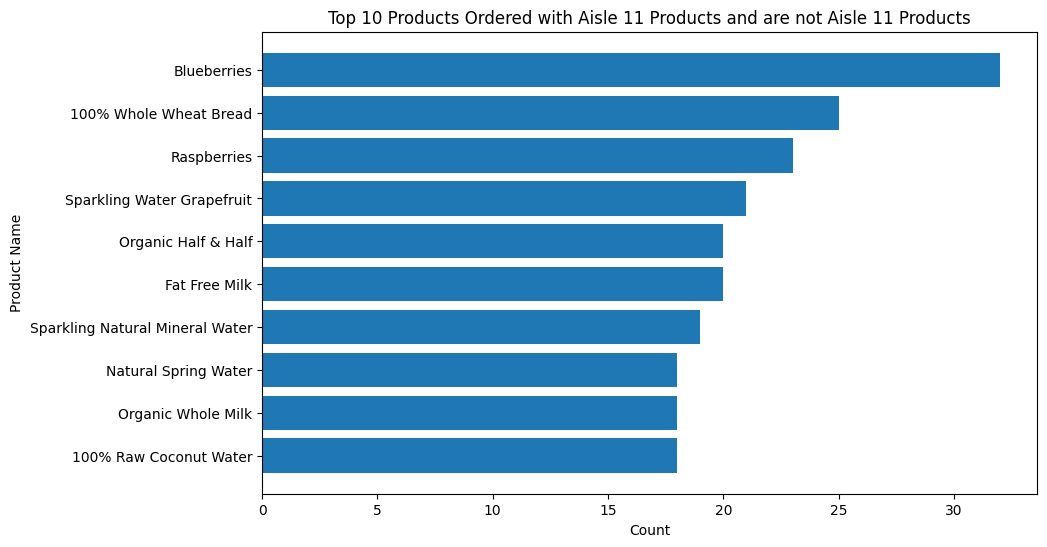

In [34]:
#Get all orders that have a products from aisle 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['aisle_id'] == 11]['order_id'].unique()
#Show products that are ordered with aisle 11 products
df_aisle_11_products = df_order_products_train[df_order_products_train['order_id'].isin(df_aisle_11_orders)]
df_aisle_11_products = df_aisle_11_products.groupby('product_id').size().reset_index(name='count')
df_aisle_11_products = df_aisle_11_products.merge(df_products, on='product_id', how='left')
df_aisle_11_products = df_aisle_11_products.sort_values(by='count', ascending=False)
#Create df that has aisle 11 orders without aisle 11 products
df_aisle_11_products = df_aisle_11_products[~df_aisle_11_products['product_id'].isin(df_order_products_train[df_order_products_train['aisle_id'] == 11]['product_id'])]

#Show top 10 products that are ordered with aisle 11 products and are not aisle 11 products
display(df_aisle_11_products.head(10))

#Plotting the top 10 products ordered with aisle 11 products and are not aisle 11 products
plt.figure(figsize=(10, 6))
plt.barh(df_aisle_11_products['product_name'][:10], df_aisle_11_products['count'][:10])
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top 10 Products Ordered with Aisle 11 Products and are not Aisle 11 Products')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top

In [41]:
L = []
L = list(df_ordered_with__al_products_train.groupby("order_id")['aisle_id'].agg(list))
len(L)

2723

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(L).transform(L)
df = pd.DataFrame(te_ary, columns=te.columns_)
#df = df.sample(frac=0.8, random_state=42)  # Sample 60% of the data for faster processing